In [2]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import numpy as np

Welcome to JupyROOT 6.30/06


## IF ROOT

In [3]:
data = uproot.open('../Dati/25_03/Run_chall_Cs_Measurements_Only_3_25_2024_0000.root')

amp = np.array(data['tree'].arrays()['amp'])
charge = np.array(data['tree'].arrays()['charge'])


## IF .DAT

In [27]:
def load_histo(dat_PATH):
    data = np.loadtxt(dat_PATH, skiprows=0, comments='==')
    noises_edges = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))
    noises_values = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))

    for i in range(int(data.shape[0]/2)):
        noises_edges[i] = (data[2 * i])
        noises_values[i] = (data[2 * i + 1])

    return noises_edges, noises_values

In [32]:
PATH_HR = "../Dati/19-04/2 batch/Run_Cs_chall_ChargeHistos_4_19_2024_high_range.dat"
PATH_LR = "../Dati/19-04/2 batch/Run_Cs_chall_ChargeHistos_4_19_2024_low_range.dat"


channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, -1, 8, 9, -1, -1, 10, 11]
rate = np.zeros(16)

for channel in range(16):
    if(channel == 12 or channel == 13 or channel == 1 or channel == 9):
        continue

    if channel in [0, 2, 6, 10, 11, 14]:
        edge_N, bin_N = load_histo(PATH_LR)
    else:
        edge_N, bin_N = load_histo(PATH_HR)

    bin_N = bin_N[channel_idx[channel]]
    
    rate[channel] = bin_N.sum()
    
rate = rate / (2 * 60 * 60)


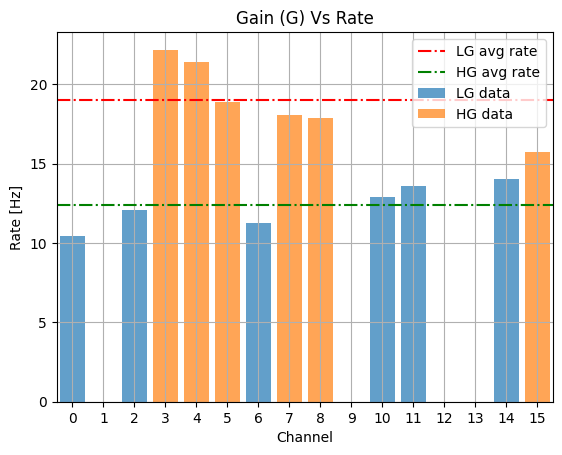

In [57]:
HR_avg = rate.sum(where = [True, False, True, False,
                           False, False, True, False,
                           False, False, True, True, 
                           False, False, True, False]) / 6

LR_avg = rate.sum(where =  [False, True, False, True,
                           True, True, False, True,
                           True, True, False, False, 
                           True, True, False, True]) / 6


plt.bar(np.arange(16)[[0, 2, 6, 10, 11, 14]], rate[[0, 2, 6, 10, 11,  14]], alpha = 0.7, label = "LG data")
plt.plot([-0.5, 15.5], [LR_avg] * 2, ls = "-.", label = "LG avg rate", color = "red")

plt.bar(np.arange(16)[[3, 4, 5, 7, 8, 15]], rate[[3, 4, 5, 7, 8, 15]], alpha = 0.7, label = "HG data")
plt.plot([-0.5, 15.5], [HR_avg] * 2, ls = "-.", label = "HG avg rate", color = "green")



plt.xlabel("Channel")
plt.ylabel("Rate [Hz]")
plt.grid()
trash = plt.xticks(range(16))
plt.title("Gain (G) Vs Rate")
plt.xlim([-0.5, 15.5])

plt.legend()

(array([5.12940e-02, 5.99160e-02, 7.37960e-02, 7.54240e-02, 5.28150e-02,
       5.71640e-02, 9.16260e-02, 6.12740e-02, 6.86680e-02, 6.66230e-02,
       1.10699e-01, 5.77680e-02, 3.00000e-06, 2.28000e-04, 6.08160e-02,
       1.11886e-01]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5]), <BarContainer object of 16 artists>)


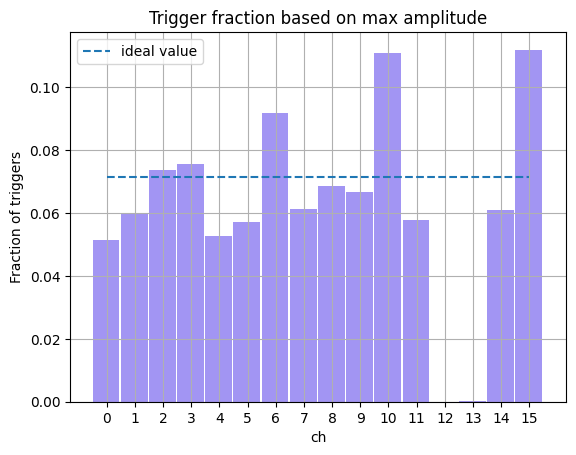

In [30]:
trash = plt.hist(np.argmin(amp, 1), np.array(range(17))-0.5, width = 0.95, align = "mid", density = True,
                 color = "mediumslateblue", alpha = 0.7)

print(trash)
plt.plot([0, 15], [1/14, 1/14], ls = "--", marker = "", label = "ideal value")
plt.xlabel("ch")
plt.ylabel("Fraction of triggers")
plt.grid()
trash = plt.xticks(range(16))
plt.title("Trigger fraction based on max amplitude")
plt.legend()


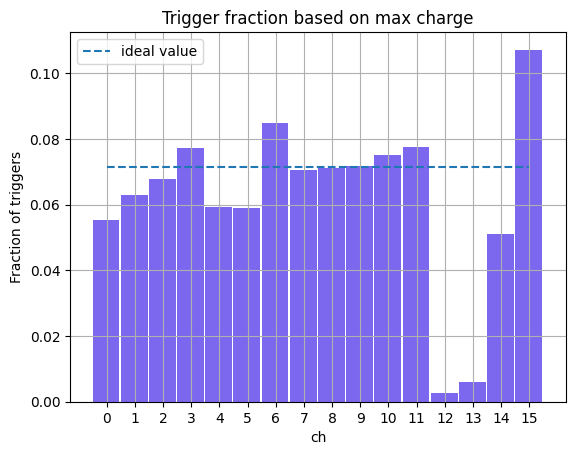

In [55]:
trash = plt.hist(np.argmin(charge, 1), np.array(range(17))-0.5, width = 0.95, align = "mid", density = True,
                 color = "mediumslateblue")
plt.plot([0, 15], [1/14, 1/14], ls = "--", marker = "", label = "ideal value")

plt.xlabel("ch")
plt.ylabel("Fraction of triggers")
plt.grid()
trash = plt.xticks(range(16))
plt.title("Trigger fraction based on max charge")
plt.legend()
plt.savefig("../Fig/Trigger_Fraction.png")